In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

Using TensorFlow backend.
/Users/felixgeorge/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/felixgeorge/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/felixgeorge/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/felixgeorge/opt/ana

In [2]:
def prepare_data():
    dat=[]
    frames=os.listdir('data')
    for i in frames:
        try:
            temp=cv2.imread('data/'+i)
            t=cv2.resize(temp,(64,64))
            dat.append(t)
        except Exception as e:
            continue
    return dat

In [3]:
from keras.models import Sequential
model=Sequential()
model.add(Conv2D(8,kernel_size=3,activation='relu',padding='same',input_shape=(64,64,3)))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(4,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(2,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(2,kernel_size=3,activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(4,kernel_size=3,activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8,kernel_size=3,activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(3,kernel_size=3,activation='sigmoid',padding='same'))

In [4]:
model.compile(optimizer='adadelta',loss='binary_crossentropy')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 8)         224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 4)         292       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 2)         74        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 2)           0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 2)          

In [6]:
import os
data=prepare_data()
len(data)

200

In [7]:
x=[]
for i in data:
    if np.array(i).shape==(64,64,3):
        x.append(np.array(i/255))
x=np.array(x)
x.shape

(200, 64, 64, 3)

In [8]:
model.fit(x,x,epochs=20,shuffle=True,validation_split=0.1)


Train on 180 samples, validate on 20 samples
Epoch 1/20
180/180 [==============================] - 4s 24ms/step - loss: 0.6950 - val_loss: 0.6924
Epoch 2/20
180/180 [==============================] - 1s 8ms/step - loss: 0.6915 - val_loss: 0.6909
Epoch 3/20
180/180 [==============================] - 1s 8ms/step - loss: 0.6895 - val_loss: 0.6890
Epoch 4/20
180/180 [==============================] - 1s 8ms/step - loss: 0.6864 - val_loss: 0.6854
Epoch 5/20
180/180 [==============================] - 1s 8ms/step - loss: 0.6804 - val_loss: 0.6790
Epoch 6/20
180/180 [==============================] - 1s 8ms/step - loss: 0.6702 - val_loss: 0.6705
Epoch 7/20
180/180 [==============================] - 1s 8ms/step - loss: 0.6576 - val_loss: 0.6612
Epoch 8/20
180/180 [==============================] - 1s 8ms/step - loss: 0.6424 - val_loss: 0.6467
Epoch 9/20
180/180 [==============================] - 1s 8ms/step - loss: 0.6235 - val_loss: 0.6280
Epoch 10/20
180/180 [==============================] 

In [9]:
dat=model.predict(x[:5])

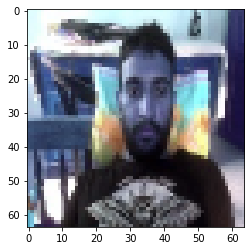

In [10]:
plt.imshow(x[0])

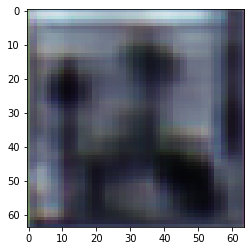

In [11]:
plt.imshow(dat[0])

In [25]:
def add_salt_pepper(image):
    row,col,ch = image.shape
    s_vs_p = 0.5
    amount = 0.004
    out = np.copy(image)
          # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    out[coords] = 1

          # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    out[coords] = 0
    return out

/Users/felixgeorge/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == '__main__':
/Users/felixgeorge/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


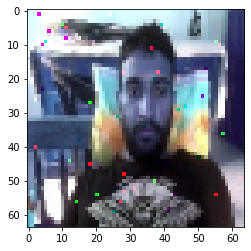

In [27]:
nois=[]
for i in range(3):
    nois.append(add_salt_pepper(x[i]))
plt.imshow(nois[0])

In [29]:
nois=np.array(nois)
nois.shape

(3, 64, 64, 3)

In [30]:
dat=model.predict(nois)

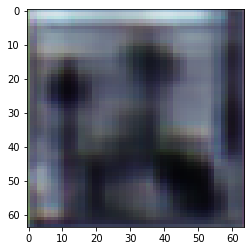

In [31]:
plt.imshow(dat[0])

# It is free of noise, ie added salt and pepper noise